### План исследования 
1. [Открыть файлы с данными и изучить общую информацию](#step_1)
2. [Подготовить данные](#step_2)
<ul>
<li>Преобразовать данные в нужные типы.</li>
<li>Обработать пропуски при необходимости.</li>
<li>Проверить наличие дубликатов.</li>
</ul>
3. [Приоритизировать гипотезы](#step_3)
4. [Проанализировать A/B-тест](#step_4)

<a id='step_1'></a>
### 1. Открыть файлы с данными и изучить общую информацию

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
pd.set_option('display.max_colwidth', 150)

In [4]:
hypothesis = pd.read_csv('hypothesis.csv')
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
orders = pd.read_csv('orders.csv')
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
visitors = pd.read_csv('visitors.csv')
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


### Вывод 
- Таблица hypothesis содержит 9 строк и 5 столбцов. Данные не содержат пропусков. Названия столбцов нужно привести к нижнему регистру. Замены типа данных не требуется. 
- Таблица orders содержит 1197 строк и 5 столбцов. В данных нет пропусков. Для поля date необходимо изменить тип данных (дата, когда был совершен заказ) на тип данных даты и времени: сейчас поле имеет тип данных object. 
- Таблица visitors содержит 62 строки и 3 столбца. Данные не содержат пропусков. Для поля date необходимо изменить тип данных (дата) на тип данных даты и времени: сейчас поле имеет тип данных object. 

<a id='step_2'></a>
### 2. Подготовить данные

In [10]:
#Преобразуем данные в нужные типы для столбцов date в таблицах orders и visitors: 
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [11]:
#Приведем столбцы к нижнему регистру для таблицы hypothesis: 
hypothesis.columns = map(str.lower, hypothesis.columns)

In [12]:
#Проверим данные на наличие дубликатов для всех трех таблиц: 
hypothesis.duplicated().sum()

0

In [13]:
orders.duplicated().sum()

0

In [14]:
visitors.duplicated().sum()

0

### Вывод 
- Для таблиц orders и visitros был исправлен тип данных для полей date с вещественного типа данных на тип данных datetime. 
- В таблице hypothesis названия столбцов были приведены к нижнему регистру. 
- Ни одна из таблиц не содержит дубликатов. 

<a id='step_3'></a>
### 3. Приоритизировать гипотезы

### ICE 

In [15]:
#Применим фреймворк ICE, чтобы приоретизировать гипотезы: 
hypothesis['ice'] = (hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [16]:
#Применим фреймворк RICE для приоритезации гипотез: 
hypothesis['rice'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Вывод
- Как мы видим, применение разных методов приоритезации гипотез существенно влияет на итоговый результат. 
- Гипотеза, которая была на первом месте (Запустить акцию, дающую скидку на товар в день рождения) при применении фреймворка ICE, оказалась на пятом месте для фреймворка RICE. Это объясняется тем, что параметр reach имеет показатель равный единице. 
- Что касается гипотез 2 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей) и 3 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок) фреймворка ICE, то они вошли в первую тройку в обоих случаях. Так гипотеза «Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей» вторая по приоритетности для фреймворка ICE и третья для фреймворка RICE. Гипотеза «Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок» занимает третье место для фреймворка ICE и первой для фреймворка RICE. Перевенство гипотезы для фреймворка RICE объясняется тем, что она имеет максимальный показатель параметра reach по сравнению с другими показателями. 

<a id='step_4'></a>
### 4. Проанализировать A/B-тест

1. График кумулятивной выручки по группам.

In [17]:
#Создадим массив уникальных дат и групп теста: 
datesGroups = orders[['date', 'group']].drop_duplicates()

In [18]:
#Агрегируем значения: 
ordersAgregated = datesGroups.apply(lambda x: 
orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date':'max', 'group':'max', 'transactionId': pd.Series.nunique, 'visitorId':pd.Series.nunique, 'revenue':'sum'})\
                                    ,axis=1).sort_values(by=['date', 'group'])


In [19]:
#То же самое делаем для таблице по пользователям: 
visitorsAggregated = datesGroups.apply(lambda x: 
visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1).sort_values(by=['date', 'group'])


In [20]:
#Объединим полученные таблицы в одну: 
cumulativeData = ordersAgregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


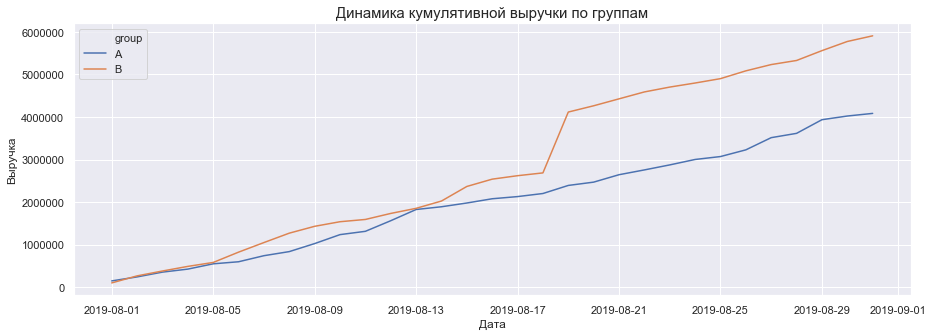

In [21]:
sns.set(rc={'figure.figsize':(15,5)})
cumulativeData_revenue_lineplot = sns.lineplot(x='date', 
                                       y = 'revenue',
                                       hue='group',
                                       data=cumulativeData)
cumulativeData_revenue_lineplot.set(xlabel='Дата', 
                        ylabel='Выручка')
cumulativeData_revenue_lineplot.axes.set_title('Динамика кумулятивной выручки по группам', 
                                   fontsize=15);

- Выручка равномерно растет в обеих группах. 
- Показатели группы B значительно лучше по сравнению с группой A (к сентябрю 2019 года показатель для группы A — 4 млн, для группы B — около 6 млн).
- Для группы B характерно наличие резкого роста в нескольких точках, начиная с 17 августа, что может свидетельствовать о наличие выбросов в данных по этой группе. 

2. График кумулятивного среднего чека по группам.

In [22]:
#Посчитаем средний чек: 
cumulativeData['revenue_per_user'] = cumulativeData['revenue']/cumulativeData['orders']

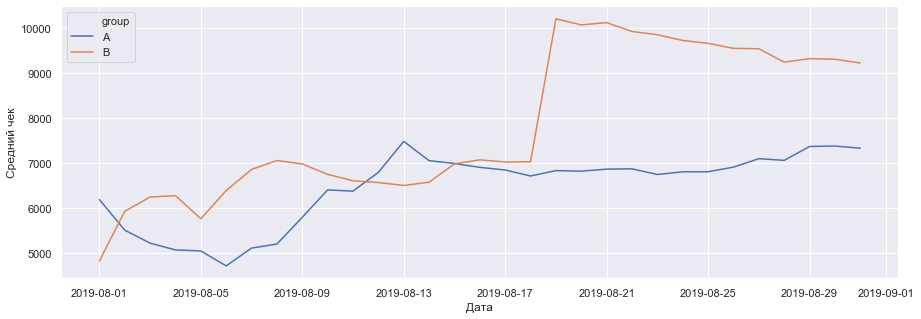

In [23]:
cumulativeData_avg_receipt_lineplot = sns.lineplot(x='date', 
                                                   y = 'revenue_per_user',
                                                   hue='group',
                                                   data=cumulativeData)
cumulativeData_avg_receipt_lineplot.set(xlabel='Дата', 
                        ylabel='Средний чек')
cumulativeData_revenue_lineplot.axes.set_title('Динамика кумулятивного среднего чека по группам', 
                                   fontsize=15);

- Ближе к концу теста чек становится равномерным для обеих групп. 
- Также, как и в случае с выручкой, средний чек для группы B значительно выше по сравнению с группой A (к сентябрю средний чек для группы B — больше 9 тыс., по сравнению с группой A, где средний чек – 7 тыс.)
- Для группы B также характерен резкий рост среднего чека с 17 августа, что может свидетельствовать о наличии особо крупного заказа или об увеличении их числа. 
- Отметим, что к концу теста показатель среднего чека группы B начинает снижаться. 

3. График относительного изменения кумулятивного среднего чека группы B к группе A.

In [24]:
#Сделаем датафрейм с кумулятивной выручкой и кумулятивным количестве заказов для каждой группы: 
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']] 
#Объединим эти данные в один датафрейм: 
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])

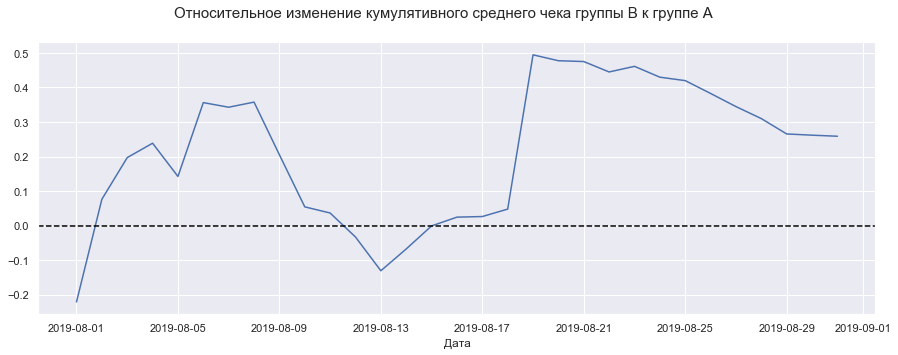

In [25]:
#Построим график: 
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.suptitle('Относительное изменение кумулятивного среднего чека группы B к группе A', fontsize=15)
plt.xlabel('Дата');

- В нескольких точках (5, 13 и 17 августа) график резко меняется, что также свидетельствует о наличии выбросов в данных. 
- В первые две недели теста рост среднего чека группы B сменился его снижением. После 13 августа средний чек начинает постепенно расти. За последние две недели теста средний чек группы B существенно выше по сравнению с группой A. 
- К окончанию теста показатель среднего чека группы B снижается. 

4. График кумулятивной конверсии по группам. 

In [26]:
#Рассчитаем конверсию:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

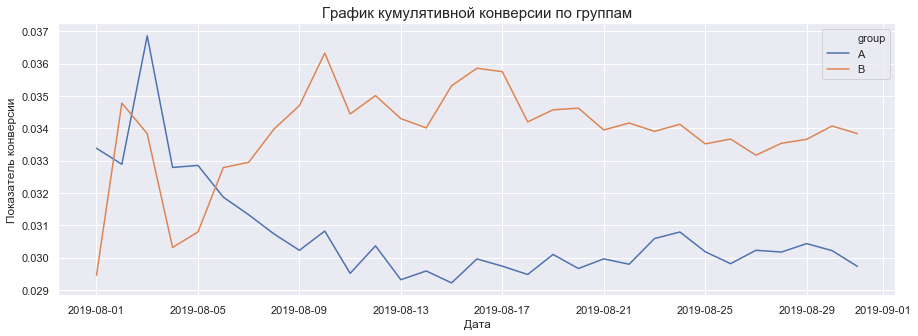

In [27]:
#Построим график: 
cumulativeData_conversion_lineplot = sns.lineplot(x='date', 
                                                  y='conversion', 
                                                  hue='group',
                                                  data=cumulativeData)
cumulativeData_conversion_lineplot.set(xlabel='Дата', 
                                       ylabel='Показатель конверсии')
cumulativeData_conversion_lineplot.axes.set_title('График кумулятивной конверсии по группам', 
                                                   fontsize=15);

- Для обеих групп нельзя сказать, что конверсии зафиксировались. 
- Видно, что на начальном этапе теста, пока не было накоплено достаточного объема данных, показатели для обеих групп колебались. 
- Также отметим симметричность графика. 
- Отдельно подчеркнем, что также, как и во всех предыдущих случаях, показатели группы B значительно выше по сравнению с группой A. 

5. График относительного изменения кумулятивной конверсии группы B к группе A. 

In [28]:
#Создадим датафреймы с данными по каждой из групп: 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
#Объединим их в единый датафрейм: 
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', 
                                                                           right_on='date', 
                                                                           how='left', 
                                                                           suffixes=['A', 'B'])

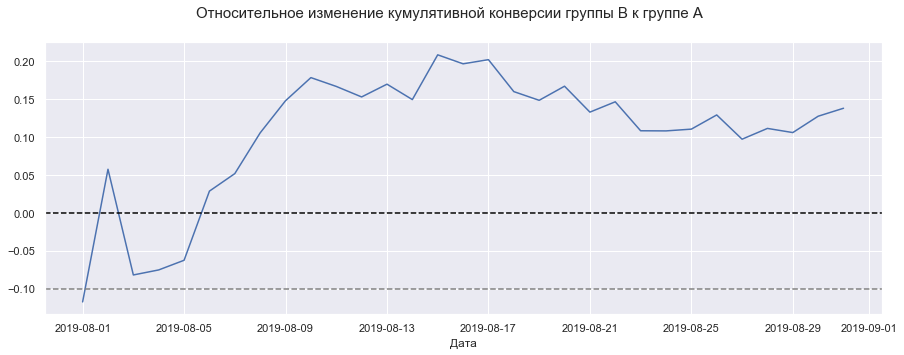

In [29]:
#Построим график: 
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.suptitle('Относительное изменение кумулятивной конверсии группы B к группе A', fontsize=15);

- На начальных этапах теста (до 6 августа) группа B проигрывала группе A, но затем показатель конверсии группы B стал стабильно показывать лучший результат по сравнению с группой A. 

6. Точечный график количества заказов по пользователям. 

In [30]:
#Посчитаем количество заказов для каждого пользователя: 
ordersByUsers = orders.drop(['date', 'revenue', 'group'], axis=1).groupby('visitorId', as_index=False)\
.agg({'transactionId':pd.Series.nunique})
ordersByUsers.columns = ['userId','orders']

In [31]:
ordersByUsers['orders'].value_counts()

1     937
2      64
3      17
5       6
4       3
11      2
9       1
8       1
Name: orders, dtype: int64

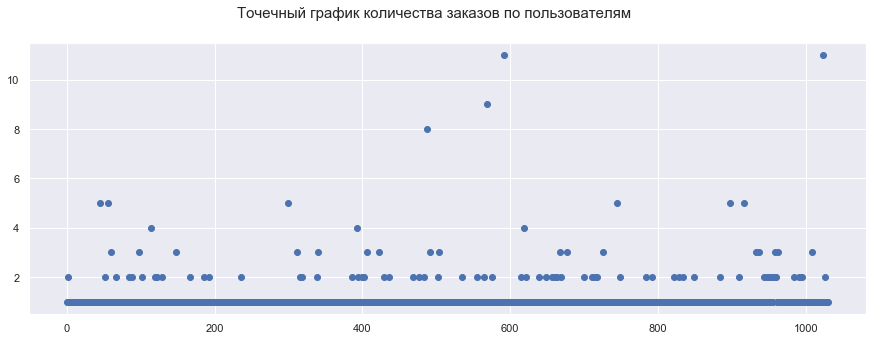

In [32]:
#Построим точечный график: 
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.suptitle('Точечный график количества заказов по пользователям', fontsize=15);

- Превалирующая часть покупателей совершили заказ только один раз (937 случаев), но значительную долю составляют и пользователи с 2-3мя заказами (всего 81 случай). 
- Точечный график также подтверждает это: мы видим, что достаточно много пользователей с 2-3 заказами. 
- Максимальное количество заказов, которое было зафиксировано за месяц – 11. 

7. Посчитаем 95-й и 99-й перцентиль, чтобы выбрать границу для определения аномальных пользователей. 

In [33]:
print(*np.percentile(ordersByUsers['orders'], [95, 99]))

2.0 4.0


- Не более 5% пользователей делали больше двух заказов. 
- Не более 1% пользователей делали больше одного заказа. 
- В качестве нижней границы числа заказов выберем пользователей, которые сделали больше двух заказов. 

8. Точечный график стоимостей заказов.

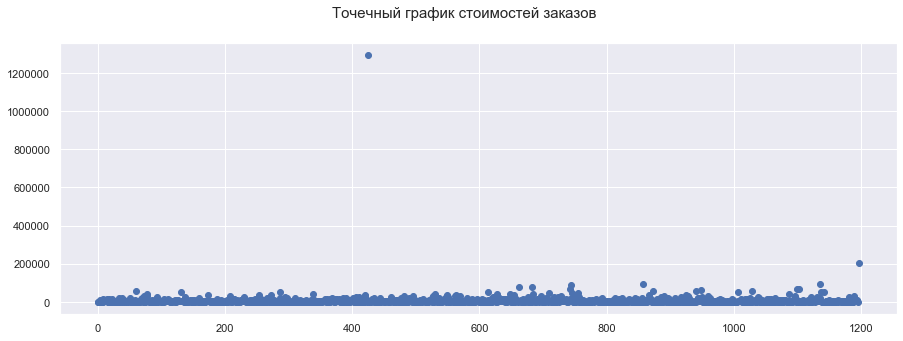

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.suptitle('Точечный график стоимостей заказов', fontsize=15);

- Практически все заказы находятся в пределах 200000. 
- Есть один аномально крупный заказ, стоимость которого более 1 млн (1 200 000), а также один заказ стоимость которого больше 200000. Учитывая показатели графиков, скорее всего, оба эти заказа относятся к группе B. 

9. Посчитаем 95-й и 99-й перцентили стоимости заказов и выберем границу для определения аномальных заказов. 

In [35]:
print(*np.percentile(orders['revenue'], [95, 99]))

28000.000000000004 58233.19999999999


- Не более 5% пользователей сделали заказы на сумму больше 28 тыс. 
- Не более 1% пользователей сделали заказ на сумму больше 58 тыс.
- Для анализа «очищенных данных» исключим заказы стоимостью больше 28 тыс. 

10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. 

In [36]:
#Подготовим данные сначала по таблице visitors: 
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [37]:
#Теперь по таблице orders: 
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative= ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']


In [38]:
#Соединим полученные данные в одну таблицу: 
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [39]:
#Создадим переменные для каждой группы, где, для пользователей, которые совершили заказ хотя бы 1 раз, укажем число совершенных заказов: 
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False)\
.agg({'transactionId': pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False)\
.agg({'transactionId': pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [40]:
#Создадим переменные для каждой группы, где будут также учтены пользователи, которые не совершили заказов: 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),\
                                                        name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),\
                                                        name='orders')],axis=0)

In [41]:
#Применим U-критерий Манна-Уитни: 
print("p_value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
#Вычислим относительный прирост конверсии группы B:
print("Относительный прирост конверсии группы B: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p_value: 0.008
Относительный прирост конверсии группы B: 0.138


- p-value меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.
- Показатель конверсии группы B лучше на 14% по сравнению с группой A. 

11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [42]:
#Рассчитаем статитстическую значимость различий в среднем чеке между группами:
print("p_value: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
                                          orders[orders['group']=='B']['revenue'])[1]))
#Также посмотрим на относительные различия в среднем чеке между группами: 
print("Относительный прирост среднего чека группы B: {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p_value: 0.365
Относительный прирост среднего чека группы B: 0.259


- p-value больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем.
- Средний чек группы B значительно выше по сравнению с группой A - на 26%. 

12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

In [43]:
print('Количество пользователей в группе A:', ordersByUsersA['userId'].count())

Количество пользователей в группе A: 503


In [44]:
print('Количество пользователей в группе B:', ordersByUsersB['userId'].count())

Количество пользователей в группе B: 586


In [45]:
all_users = pd.concat([ordersByUsersA['userId'], ordersByUsersB['userId']], axis=0)

In [46]:
print('Количество пользователей, которые попали в обе группы:', all_users.count() - all_users.nunique())

Количество пользователей, которые попали в обе группы: 58


In [47]:
#Примем за аномальных пользователей тех, кто совершил заказы на сумму дороже 200000, а также пользователей, которые совершили 
#больше двух заказов:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],\
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

In [48]:
print('Количество аномальных пользователй:', *abnormalUsers.shape)

Количество аномальных пользователй: 74


In [49]:
#Исключим аномальных пользователей из нашей выборки:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],\
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),\
                             name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],\
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),\
                             name='orders')],axis=0)

In [50]:
print("p_value: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный прирост конверсии группы B: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p_value: 0.007
Относительный прирост конверсии группы B: 0.173


- Результаты по конверсии практические не изменились. p_value меньше 0.05, следовательно, мы может отвергнуть нулевую гипотезу. 
- Показатель конверсии группы B также значительно лучше по сравнению в группой A: при исключении аномальных пользователей – 17%. 

13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [51]:
orders = orders.rename(columns={'visitorId':'userId'})

In [52]:
print("p_value: {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'])[1]))

print("Относительный прирост среднего чека группы B: {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p_value: 0.369
Относительный прирост среднего чека группы B: -0.020


- Аномалии повлияли на средний чек, так как p-value увеличился, хотя мы также не отвергаем нулевую гипотезу.
- Значительно изменился относительный прирост среднего чека группы B, который в итоге оказался хуже по сравнению с группой A на 2%, а не лучше по сравнению с группой B, как это было для «сырых данных» на целых 26%. 

14. Примем решение по результатам теста. 

Для этого кратко повторим ранее полученные выводы в результате теста: 
- Динамика кумулятивной выручки по группам: показатели группы B значительно лучше по сравнению с группой A; для группы B характерно наличие резкого роста в нескольких точках. 
- График кумулятивного среднего чека по группам: средний чек для группы B значительно выше по сравнению с группой A. 
- График относительного изменения кумулятивного среднего чека группы B к группе A: за последние две недели теста средний чек группы B существенно выше по сравнению с группой A. 
- График кумулятивной конверсии по группам: показатели группы B значительно выше по сравнению с группой A. 
- График относительного изменения кумулятивной конверсии группы B к группе A: на начальных этапах теста (до 6 августа) группа B проигрывала группе A, но затем показатель конверсии группы B стал стабильно показывать лучший результат по сравнению с группой A.
- Статистическая значимость различий в конверсии между группами по «очищенным» данным. Отвергаем нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет (p-value = 0.007). Показатель конверсии группы B также значительно лучше по сравнению в группой A: при исключении аномальных пользователей – на 17%.
- Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет (p-value =0.296). Показатель по среднему чеку группы B хуже по сравнению с группой A на 10%. 

Таким образом:
1. Есть статистически значимое различие по конверсии между группами, как по «сырым», так и по «очищенным» данным. 
2. Показатель конверсии лучше для группы B по сравнению с группой A.  
3. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. 
4. График кумулятивного среднего чека по группам, а также график относительного изменения кумулятивного среднего чека группы B к группе A характеризовали группу B как более успешную. Отметим, что ближе к окончанию теста показатель для группы B начинает снижаться. Также при удалении аномальных данных, мы выяснили, что относительный показатель среднего чека группы B хуже на 10% по сравнению с группой A. 
---
На мой взгляд, корректным решеним будет **остановить тест и зафиксировать победу группы B**, так как мы зафиксировали статистически значимое различие по конверсии между группами и установили, что относительный показатель конверсии группы B лучше по сравнению с группой A на 17%. 